# Arrays in Python

<img src="c-array1.png" style="float: left">

To be effective as data scientists we must understand how data is stored and abstracted, as this will enable us to make appropriate decisions about data ingestion, storage, manipulation and interpretation. In this session we will look specifically at arrays in Python - one of the most important data structures. Raw python and NumPy treat arrays differently - a distinction that underpins much of the data science that follows later in this course.

## 1 Python data structures: the double edged sword

One of the major strengths of Python is that it is a <i><b> dynamically typed </b></i> language. This means a name can be linked to an object whose type changes at different times during the execution of some Python code. This gives great flexibility and makes Python easy and intuitive to use to write complex code.
    
The alternative to dynamically typed languages are <i><b> static typed </b></i> languages, such as C and Java. In statically-typed languages the type of each variable must be declared and held constant throughout the code execution.
    
With this distinction in mind, consider that Python is a high-level language built predominantly using C. That means that dynamically-typing requires manipulation of C variables "under-the-hood". In C, switching a variable from one type to another would lead to a compilation failure, yet Python, which is itself built using C, allows it.

Let's see that in action now - we will assign the value ten to variable "x" as an integer, then overwrite it as a string and a floating point value. 

In [1]:
# Demonstrating the dynamic-type nature of Python: integer, string, float
x = 10
x = "ten"
x = 10.0

In [2]:
print(x)

10.0


This enables a huge amount of flexibility for Python programmers - we don't need to explicitly assign data types to variables names and we can be effficient in juggling data-types for a single variable. However, this flexibility comes at a cost. Each Pythoin object requires additional information to be stored alongside the variable name and value to enable type-switching, which means there is a memory implication.

## 2 What Python objects look like in memory

Since Python is written in C, every Python object is ultimately a C structure. That structure contains the variable name and value, but also a collection of other crucial data. An integer in C is simply a name and a value ("x", 10). An integer in Python is a pointer to a C structure containing four items:

    ob_refcnt, a reference count that helps Python silently handle memory allocation and deallocation
    ob_type, which encodes the type of the variable
    ob_size, which specifies the size of the following data members
    ob_digit, which contains the actual integer value that we expect the Python variable to represent.
    
This is illustrated in Figure 1 below, where the C integer is simply a value, whereas the Python integer is a pointer to a structure with header information (the four items above) and the integer value.


<img src="cint_vs_pyint.png">

<i> Figure 1: Integers in C and Python (Image from Jake van der Plas's Data Science Handbook) </i>

## 3 Python Lists and Arrays

### 3.1 Lists

In Python collections of data can be stored together under a single variable name. A simple one-dimensional sequence of data can be stored as a list. A list is one of the simplest types of data container. Lists make use of the dynamic-type nature of Python, since they can contain different data types in a single container. Lists are mutable, meaning they can be altered even after their creation.

First, let's make a list containing integers...

In [3]:
L = list(range(10))
L

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Now, let's add some strings to the same container, L...

In [4]:
L = L + ["one","two","three"]
L

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'one', 'two', 'three']

Finally, let's also add some floating point numbers...

In [5]:
L = L + [1.0, 2.0, 3.0]
L

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'one', 'two', 'three', 1.0, 2.0, 3.0]


At this stage, we have created a list and populated it with integers. Then we made use of the mutable nature of Python lists and Python's dynamic type to add strings and floats to the list. The result is a list containing three different data types in a single list. Let's just confirm with a quick check...


 

In [6]:
print("container type = ",type(L), "\ntype of first element = ", type(L[0]), 
      "\ntype of tenth element", type(L[11]), "\ntype of final element = ", type(L[-1]))

container type =  <class 'list'> 
type of first element =  <class 'int'> 
type of tenth element <class 'str'> 
type of final element =  <class 'float'>


### 3.2 Arrays

While the capability to do this is very useful, it is also inefficient and comparatively memory-hungry. Therefore, Python offers several options for storing data in static-type containers. For example, a dynamic-type "list" can become a static-type "array". In this case, we must specify the data type for the array.

In [7]:
import array
L = list(range(10)) # make list containing ten integers
integer_array = array.array('i',L) # convert list to static-type array of integers
float_array = array.array('f',L) # convert list L to static-type array of floats

print("integer array = ", integer_array)
print("float array = ", float_array)

integer array =  array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
float array =  array('f', [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0])


### 3.3 NumPy arrays

The size of the array in memory is much less than the size of the list because the type is static and the header information required for each object is reduced. The Python package "NumPy" (numerical python) has its own array structure that is also static-type. However, there is also a rich collection of operations designed specifically to operate efficiently on numpy arrays.

<img src="array_vs_list.png">

<i> Figure 1: Comparison of structure of numpy arrays and lists (Image from Jake van der Plas's Data Science Handbook) </i>

First we will import numpy under the alias np, then convert our list, integer array and float array to numpy arrays.

In [8]:
import numpy as np

A = np.array(L)
B = np.array(integer_array)
C = np.array(float_array)

print("A type = ", type(A), "A content type = ", type(A[0]), "A contents = ", A)
print("B type = ", type(B), "B content type = ", type(B[0]), "B contents = ", B)
print("C type = ", type(C), "C content type = ", type(C[0]), "C contents = ", C)



A type =  <class 'numpy.ndarray'> A content type =  <class 'numpy.int64'> A contents =  [0 1 2 3 4 5 6 7 8 9]
B type =  <class 'numpy.ndarray'> B content type =  <class 'numpy.int32'> B contents =  [0 1 2 3 4 5 6 7 8 9]
C type =  <class 'numpy.ndarray'> C content type =  <class 'numpy.float32'> C contents =  [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


Notice that the type of all three containers are numpy arrays, but the types of the contents differ in each array. The original list is converted into 64 bit integers. Where we have defined the data type as "integer" it has been as 32 bit integers. In array C the floating point numbers from "float_array" are still floating point numbers. We can change the data type by explicitly defining it in the array creation.

In [9]:
A = np.array(L,dtype="int64")
print("Type of container = ", type(A), "type of content = ", type(A[0]))
print(A)

Type of container =  <class 'numpy.ndarray'> type of content =  <class 'numpy.int64'>
[0 1 2 3 4 5 6 7 8 9]


The reason arrays and numpy arrays are more memory efficient than lists (or, worse - lists of lists!) is that they are static type - each element in the structure is a single value of a fixed type, so the additional overheads necessary for dynamic typing are stripped away and data type information can be stord once for the array as a whole rather than for each element. Below we create three data structures - numpy array, python array and python list - and apply a function by looping over each element. Then we print the amount of memory (bytes) each data structure occupies on disk.


In [10]:
#set up three identical datasets as different structures
numpy_array = np.array(range(1000000),dtype='int') # create numpy array
python_array = array.array('q',range(1000000)) # create python array - q = 8bit integer
python_list = list(range(1000000)) # create python list


# time a simple element-wise squaring
%timeit [i **2 for i in numpy_array]
%timeit [i **2 for i in python_array]
%timeit [i **2 for i in python_list]

# display size of each dataset on disk
import sys
print("size of numpy_array = ", sys.getsizeof(numpy_array))
print("size of python_array = ", sys.getsizeof(python_array))
print("size of python_list = ", sys.getsizeof(python_list))


178 ms ± 13.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
222 ms ± 4.84 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
221 ms ± 14.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
size of numpy_array =  8000096
size of python_array =  8183800
size of python_list =  9000120


Notice that the numpy array has the smallest memory allocation and fastest computation time - this is because it is a static type data structure that consists of a continuous 1D sequence of values, with the structure size, shape and data type all saved once at the array level rather than element-wise. The list has by far the highest memory allocation because it is dynamically-typed and each element in the array has its own header information. Notice also that performing the operation over the numpy array was not dramatically faster than operating over the python array or list. This is because we applied the function in a loop that forced numpy to access each element in turn.

However, the real power of numpy becomes apparent when we consider the implicit vectorisation and efficient storage of complex multidimensional data. Where we can vectorise computation over a numpy array the computation speed is very high, but applying loops to numpy arrays is comparatively slow. We can demonstrate this by applying the same function, but allowing numpy to vectorise...

In [11]:
%timeit numpy_array **2 # vectorise

805 µs ± 47.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


The computation speed for the numpy array has increased by a factor of ~191! This is an important point to note - looping over elements in numpy arrays is inefficient and should be avoided where possible, whereas vectorised operations over numpy arrays are very efficient and should be used as often as possible!

### 3.4 Visualising 1D arrays

We can visualise the array using the Python package Matplotlib. As the array has one dimension it can easily be plotted on a simple x,y plot where the x value is simply the index of each element in the array.

In [12]:
import matplotlib.pyplot as plt
numpy_array = np.array(np.sin(np.arange(0,100,1)))
plt.figure(figsize=(10,8)),plt.plot(numpy_array)

(<Figure size 1000x800 with 1 Axes>,
 [<matplotlib.lines.Line2D at 0x7fc928382410>])

## 4 Multidimensional Numpy Arrays

### 4.1 2D Arrays

So far, we have used arrays with only one dimension - i.e. a single row of elements. However, numpy really comes into it's own when dealing with multidimensional arrays. A two dimensional array would look something like a table, or an Excel spreadsheet in that there are both rows and columns. Let's take a look at a random set of integers organised into a 2D array:

In [13]:
twoDimArray = np.random.randint(100, size=(10, 10))
twoDimArray

array([[60, 44, 93, 46,  5, 11, 27, 55,  5, 51],
       [90, 40, 67, 22, 96, 35, 15,  7, 90, 93],
       [97, 54, 11, 35, 30, 69, 94, 49, 48, 16],
       [ 1, 86, 54, 82, 48,  9, 36, 61, 68,  2],
       [21,  2, 59, 46, 44,  2, 25, 76,  6, 39],
       [51, 54, 74, 93, 43, 95,  6, 59, 89, 77],
       [88,  2, 69, 46, 65, 12,  6, 12, 39, 19],
       [49,  9,  7, 26, 50, 53, 46, 84, 30,  1],
       [49, 26, 41, 16, 32, 92, 52, 13, 38, 74],
       [20, 74, 20, 27, 64, 95, 36, 24, 64, 99]])

We can use numpy's native functions to query this 2D array and gather information about its structure and contents

In [14]:
size = np.size(twoDimArray)
shape = np.shape(twoDimArray)
mean = np.mean(twoDimArray)
stdev = np.std(twoDimArray)

print(size)
print(shape)
print(mean)
print(np.round(stdev,2))

100
(10, 10)
45.32
29.23


Let's create a list of 10 lists, each containing 10000 elements. This is equivalent to creating a 10 x 100000 element array, but the value are stored in 10 list objects. We can check the size and shape to confirm this...

In [15]:
L1 = list(range(10000))
L2 = list(range(10000))
L3 = list(range(10000))
L = list([L1,L1,L1,L1,L1,L1,L1,L1,L1,L1])

print(len(L))
print(np.size(L))

10
100000


Now we organise the same data into a 2D array of identical shape and size, but this time the container is a NumPy array...

In [16]:
nparray = np.arange(0,100000,1).reshape(10,10000)
print(np.shape(nparray))

(10, 10000)


In [17]:
print("size of list of lists = ",sys.getsizeof(L)) 
print("size of numpy array = ", sys.getsizeof(nparray))

%timeit [[i**2 for i in p] for p in L]  #nested list comprehension to loop through individual list, then list of lists
%timeit [i**2 for i in nparray]
%timeit nparray**2

size of list of lists =  208
size of numpy array =  112
20.6 ms ± 260 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
48.4 µs ± 1.63 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
37.8 µs ± 1.48 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


As for the 1D examples, the size on disk and the computation time are both reducd significantly by using numpy arrays instead of lists, and especially when the operation is vectorised.

### 4.2 Slicing Arrays

We can identify individual elements in the array by defining a row and column index...

In [18]:
print("element in top left of array (i.e. first element) = ", twoDimArray[0,0])
print("element in bottom right of array (i.e. last element)", twoDimArray[-1,-1])
print("element at bottom of second column = ", twoDimArray[-1,1])

element in top left of array (i.e. first element) =  60
element in bottom right of array (i.e. last element) 99
element at bottom of second column =  74


Or we can identify entire rows and columns, or sections of rows and columns...

In [19]:
print("entire first row = ", twoDimArray[0,:])
print("entire second column = ", twoDimArray[:,1])
print("first 5 elements of third row = ", twoDimArray[2,0:5])

entire first row =  [60 44 93 46  5 11 27 55  5 51]
entire second column =  [44 40 54 86  2 54  2  9 26 74]
first 5 elements of third row =  [97 54 11 35 30]


This process of isolating individual elements or parts of an array is known as "slicing". This relies on "indexing" which is the concept of having a value representing the position of a dtaa element in addition to the actual value stored in that location.

### 4.3 Visualiaing 2D arrays

We can also visualise a 2D array using matplotlib. Since we have data distributed in two dimensions, this will be represented as a plane of dtaa divided up into individual pixels, with one pixel representing one element in the 2D array. For this we need to use the imshow function from matplotlib.pyplot instead of the plot function.

(Text(0, 0.5, 'ROW INDEX'), Text(0.5, 0, 'COLUMN INDEX'))

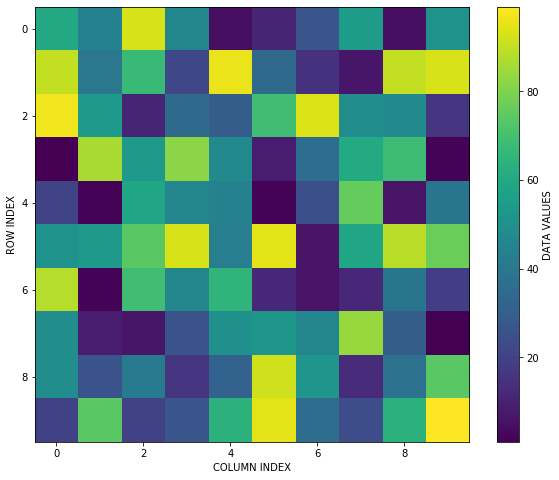

In [20]:
plt.figure(figsize=(10,8)),plt.imshow(twoDimArray),plt.colorbar(label = 'DATA VALUES')
plt.ylabel('ROW INDEX'), plt.xlabel('COLUMN INDEX')

### 4.4 3D Arrays

We can also do the same thing for higher dimensional arrays. As we have seen a two dimensional array can be thought of as a dataset organised into rows and columns. Like a map, a 2D array has x and y coordinates, which are equivalent to the data indices.

A three dimensional array adds the equivalent of a "z" dimension. This can be thought of as a vertical stack of two dimensional arrays on top of one another, where a vertically oriented column extends vertically through each index on the 2D array. Let's create a 3D array of random integers...


In [21]:
threeDimArray = np.random.randint(100, size=(1000,10,10))
threeDimArray

array([[[42, 96, 26, ..., 25, 86, 84],
        [40, 15, 41, ..., 72, 81, 79],
        [37, 28, 15, ...,  6, 79,  9],
        ...,
        [25, 33, 19, ..., 89, 69, 99],
        [86, 29, 95, ...,  5,  1, 22],
        [77, 89, 81, ..., 30, 68, 91]],

       [[78, 23, 23, ..., 60, 51, 72],
        [82, 36, 64, ...,  8, 29, 70],
        [59, 79, 72, ..., 34, 94, 37],
        ...,
        [ 3, 84, 68, ..., 11, 97, 48],
        [90, 61, 29, ..., 78, 62, 48],
        [27, 54, 62, ..., 91, 98, 44]],

       [[75, 72,  1, ..., 89, 47, 74],
        [86, 21, 47, ..., 26, 32,  5],
        [89,  6, 93, ..., 17, 39, 41],
        ...,
        [48,  5, 97, ..., 58, 64, 70],
        [29, 64, 37, ..., 26, 22,  3],
        [56, 16, 84, ..., 33, 15, 93]],

       ...,

       [[85, 47, 33, ..., 15, 93, 40],
        [29, 82, 49, ..., 21,  9, 27],
        [62,  2, 65, ..., 72, 19, 46],
        ...,
        [24, 48, 28, ..., 36, 68, 67],
        [34, 39, 62, ..., 32, 34,  1],
        [96, 69, 22, ..., 32, 18

Note that printing the 3D array to the console causes ten 2D arrays to be displayed. This is because these 2D arrays should be stacked into one 3 dimensional array - the third dimension, equivalent to a "z" axis, is deconstructed to enable us to see the entire contents of the array without stacked layers obscuring those beneath.

In [22]:
print(np.shape(threeDimArray))
print(np.size(threeDimArray))


(1000, 10, 10)
100000


In [23]:
%timeit threeDimArray**2

39.2 µs ± 1.11 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Notice that the computation time for applying the operation over the 3D array is the same as the computation time over the 2D array of the same size. The number of dimensions has not had a noticeable effect on computation time.

### 4.5 Visualising 3D arrays

ValueError: shape mismatch: objects cannot be broadcast to a single shape

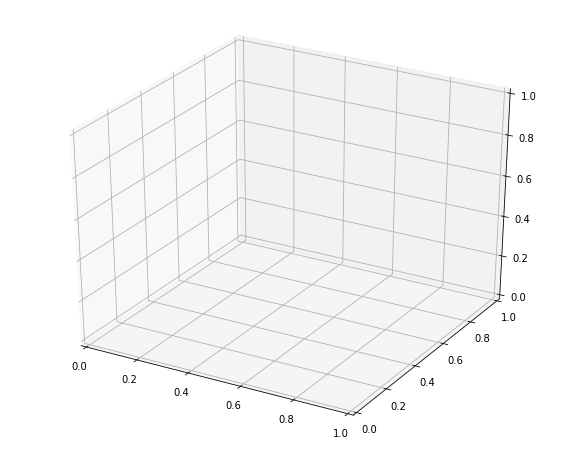

In [24]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.plot_surface(threeDimArray[0,:,:], threeDimArray[:,0,:], threeDimArray[:,:,0], rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface')

# 5 Take-aways

### 1. Python objects are C structures inside some wrapper code
### 2. The less additional information stored with each value, the smaller the amount of memory required
### 3. Arrays are structures that store multiple elements and can be multidimensional
### 4. NumPy arrays are computationally efficient, especially when operations can be vectorised
### 5. Looping over NumPy arrays should be avoided in favour of vectorised operations

# 6 Excercises:

In [ ]:
# 1) Create a list containing three dtypes

In [ ]:
# 2) Create a list of lists containing ordered integers so that the resulting structure has 5 rows and 5 columns

In [ ]:
# 3) Turn your list from 2) into a python array and a NumPy array

In [ ]:
# 4) Compare the memory allocation for your 2D list and NumPy Array

In [ ]:
# 5) Time the following operations, check that the outputs are identical. Which is faster and by how much?

# HINT you will need to reformat the looped operation into a function in order to time it (see class notes)

import numpy as np

# Operation 1
X = list(range(10000000))
for i in range(len(X)):
    X[i]**2

# Operation 2
X = np.array(X)


# 7 Further Reading

https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/02.02-The-Basics-Of-NumPy-Arrays.ipynb

https://www.labri.fr/perso/nrougier/from-python-to-numpy/#memory-layout
